In [78]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns", 500)
import seaborn as sns

In [38]:
df = pd.read_csv("refined.csv")
df = df.drop(columns="Column")

In [12]:
df.dtypes

Column                                  int64
average_ash_content                   float64
average_heat_content                  float64
average_mercury_content               float64
average_sulfur_content                float64
chlorine_content                      float64
coalmine_county                        object
coalmine_msha_id                      float64
coalmine_name                          object
coalmine_state                         object
coalmine_type                          object
contract_expiration_date               object
contract_type                          object
energy_source                          object
fuel_cost                             float64
fuel_group                             object
moisture_content                      float64
month                                   int64
natural_gas_delivery_contract_type     object
natural_gas_supply_contract_type       object
natural_gas_transportation_service     object
operator_id                       

In [5]:
df.describe()

,Unnamed: 0,average_ash_content,average_heat_content,average_mercury_content,average_sulfur_content,chlorine_content,coalmine_msha_id,fuel_cost,moisture_content,month,plant_id,quantity,year
count,378045.000000,378045.000000,378045.000000,136483.000000,378045.000000,9084.000000,1.373830e+05,3.128770e+05,18038.000000,378045.000000,378045.000000,3.780450e+05,378045.000000
mean,227876.856361,3.822055,10.095588,0.636175,0.563239,9538.313408,3.429264e+06,1.020476e+03,1283.056381,6.430123,13868.045860,1.782682e+05,2011.727136
std,144155.991576,5.714074,10.230534,2.296342,1.006608,36227.702288,1.668549e+06,5.954490e+04,1078.905668,3.442772,20218.944966,6.135453e+05,3.218277
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.001140e+05,-7.193000e+03,0.000000,1.000000,3.000000,1.000000e+00,2008.000000
25%,95039.000000,0.000000,1.022000,0.000000,0.000000,0.000000,1.518544e+06,2.331000e+02,288.000000,3.000000,2070.000000,4.127000e+03,2009.000000
50%,221993.000000,0.000000,5.708000,0.000000,0.000000,0.000000,4.601433e+06,3.451000e+02,918.000000,6.000000,4940.000000,2.009600e+04,2011.000000
75%,365326.000000,7.400000,21.450000,0.000000,0.680000,0.000000,4.800977e+06,5.004000e+02,2621.000000,9.000000,8059.000000,8.122800e+04,2014.000000
max,481118.000000,62.700000,1049.000000,10.000000,8.830000,374700.000000,4.801135e+07,2.353811e+07,3824.000000,12.000000,61643.000000,4.815976e+07,2019.000000


/Users/lhinkesjones/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/lhinkesjones/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


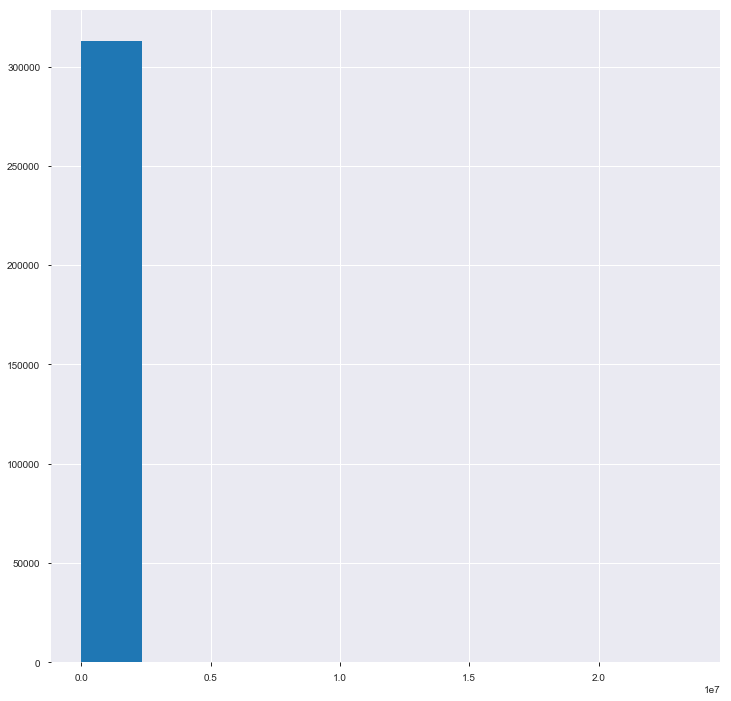

In [54]:
fig = plt.figure(figsize=(12,12))
(n, bins, patches) = plt.hist(df.fuel_cost)

In [58]:
df.fuel_cost.quantile(.99)

2551.6

In [61]:
df_2 = df[(df.fuel_cost <= df.fuel_cost.quantile(.99)) & (df.fuel_cost >0)]
df_large = df[df.fuel_cost > df.fuel_cost.quantile(.99)]
df_neg = df[df.fuel_cost <0]

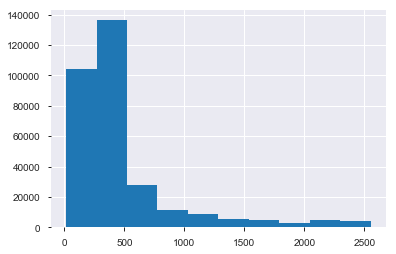

In [62]:
df_2.fuel_cost.hist()

In [36]:
df_neg.fuel_group.value_counts()

Petroleum      14
Natural Gas     6
Coal            2
Name: fuel_group, dtype: int64

In [41]:
df_2.head()

,average_ash_content,average_heat_content,average_mercury_content,average_sulfur_content,chlorine_content,coalmine_county,coalmine_msha_id,coalmine_name,coalmine_state,coalmine_type,contract_expiration_date,contract_type,energy_source,fuel_cost,fuel_group,moisture_content,month,natural_gas_delivery_contract_type,natural_gas_supply_contract_type,natural_gas_transportation_service,operator_id,operator_name,plant_id,plant_name,plant_state,primary_transportation_mode,purchase_type,quantity,regulated,reporting_frequency,secondary_transportation_mode,supplier,year
0,5.4,23.100,NaN,0.49,NaN,IMP,NaN,MINA PRIBBENOW,CL,SU,408,C,BIT,213.5,Coal,NaN,1,NaN,NaN,F,195.0,Alabama Power Co,3,Barry,AL,RV,NaN,259412,REG,M,NaN,INTEROCEAN COAL,2008
1,5.7,22.800,NaN,0.48,NaN,IMP,NaN,MINA PRIBBENOW,CL,SU,408,C,BIT,211.5,Coal,NaN,1,NaN,NaN,F,195.0,Alabama Power Co,3,Barry,AL,RV,NaN,52241,REG,M,NaN,INTEROCEAN COAL,2008
2,0.0,1.039,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NG,863.1,Natural Gas,NaN,1,NaN,NaN,F,195.0,Alabama Power Co,3,Barry,AL,PL,NaN,2783619,REG,M,NaN,BAY GAS PIPELINE,2008
3,14.7,24.610,NaN,1.69,NaN,007,NaN,ALABAMA COAL,AL,SU,1215,C,BIT,277.6,Coal,NaN,1,NaN,NaN,F,195.0,Alabama Power Co,7,Gadsden,AL,TR,NaN,25397,REG,A,NaN,ALABAMA COAL,2008
4,15.5,24.446,NaN,0.84,NaN,145,NaN,flat rock #2,AL,S,1108,S,BIT,338.1,Coal,NaN,1,NaN,NaN,F,195.0,Alabama Power Co,7,Gadsden,AL,TR,NaN,764,REG,A,NaN,D & E MINING,2008


In [44]:
df_large.contract_type.value_counts()

S     14034
C      7492
NC       76
Name: contract_type, dtype: int64

In [63]:
from patsy import dmatrices

In [88]:
fields = ["contract_type", "energy_source", "fuel_group", "plant_state", "plant_id", "operator_id", "quantity", "regulated", "reporting_frequency", "supplier", "year", "month"]
fields_c = ["C(contract_type)", "C(energy_source)", "C(fuel_group)", "C(plant_state)", "C(plant_id)", "C(operator_id)", "quantity", "C(regulated)", "C(reporting_frequency)", "C(supplier)", "C(year)", "C(month)"]

In [95]:
y, X = dmatrices("fuel_cost ~ " + "+".join(fields_c), df_2.head())

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [106]:
cols = X.design_info.column_names

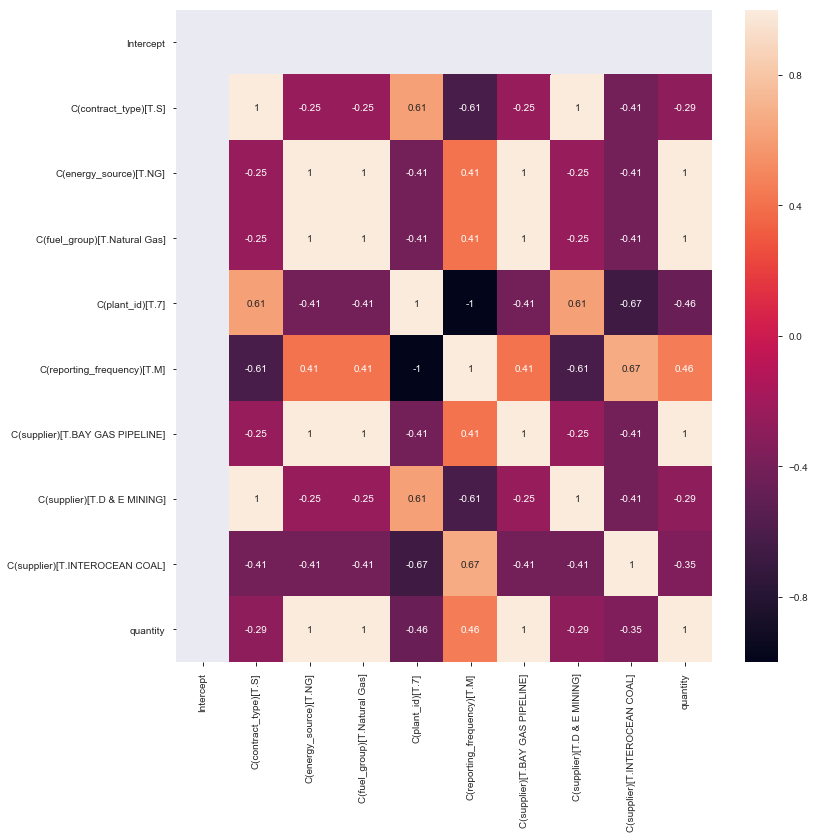

In [107]:
X = pd.DataFrame(X)
X.columns = cols
fig = plt.figure(figsize=(12,12))
corr = X.corr()
sns.heatmap(corr, annot=True)
